In [2]:
# Import libraries
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the graph
# Make sure your file is in the same directory or provide full path
G = nx.read_edgelist("ca-GrQc.txt", comments='#', nodetype=int)

print("Graph loaded successfully.")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Graph loaded successfully.
Number of nodes: 5242
Number of edges: 14496


In [3]:
# Step 2: Extract the largest connected component (for analysis)
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()

print(f"Largest Connected Component Nodes: {G_lcc.number_of_nodes()}")
print(f"Largest Connected Component Edges: {G_lcc.number_of_edges()}")


Largest Connected Component Nodes: 4158
Largest Connected Component Edges: 13428


In [4]:
# Step 3: Basic Analysis

# Diameter (requires connected graph)
diameter = nx.diameter(G_lcc)
print(f"Graph Diameter: {diameter}")

# Average clustering coefficient
avg_clustering = nx.average_clustering(G_lcc)
print(f"Average Clustering Coefficient: {avg_clustering:.4f}")


Graph Diameter: 17
Average Clustering Coefficient: 0.5569


In [9]:
!pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 51.2 MB/s eta 0:00:0000:0100:01


In [10]:
# Remove self-loops from G_lcc
G_lcc.remove_edges_from(nx.selfloop_edges(G_lcc))


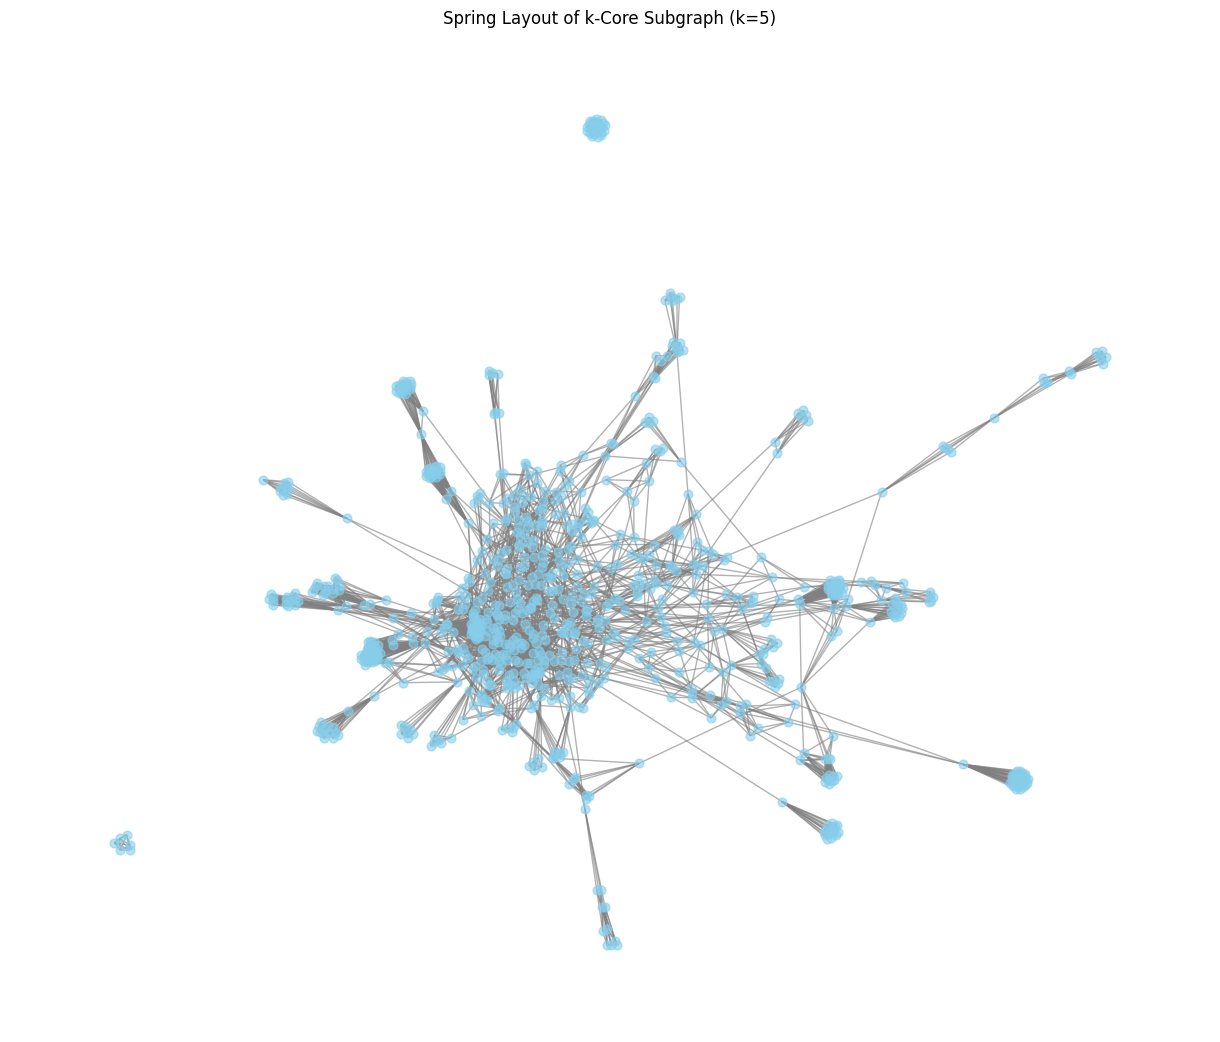

In [13]:
# Step 4 Visualization
#Optional: Get a k-core now that self-loops are removed
core_subgraph = nx.k_core(G_lcc, k=5)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(core_subgraph, seed=42)
nx.draw(core_subgraph, pos, node_size=40, node_color='skyblue', edge_color='gray', alpha=0.6, with_labels=False)
plt.title("Spring Layout of k-Core Subgraph (k=5)")
plt.show()
